The dataset consists of electricity consumption of individual household from 2006 to 2010

It is a multivariate series comprised of nine variables; they are:

* **date and time**: From 2006 to 2010

* **global_active_power**: The total active power consumed by the household (kilowatts). This is what we want to predict

* **global_reactive_power**: The total reactive power consumed by the household (kilowatts).

In general terms, the active energy is the real power consumed by the household, whereas the reactive energy is the unused power in the lines.

* **voltage**: Average voltage (volts).

* **global_intensity**: Average current intensity (amps).

* **sub_metering_1**: Active energy for kitchen (watt-hours of active energy).

* **sub_metering_2**: Active energy for laundry (watt-hours of active energy).

* **sub_metering_3**: Active energy for climate control systems (watt-hours of active energy).

We can see that the dataset provides the active power as well as some division of the active power by main circuit in the house, specifically the kitchen, laundry, and climate control. These are not all the circuits in the household.

The remaining watt-hours can be calculated from the active energy by first converting the active energy to watt-hours then subtracting the other sub-metered active energy in watt-hours, as follows

* **sub_metering_4** = (global_active_power * 1000 / 60) - (sub_metering_1 + sub_metering_2 + sub_metering_3)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Notebooks/Multivariate Time Series Forecasting

/content/drive/My Drive/Notebooks/Multivariate Time Series Forecasting


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

The columns are separated by semicolon (;). While loading the data, lets pass additional parameters.

* set infer_datetime_format=True to infer the date-time format when parsing dates
* Parse the date and time columns together as a new column called ‘datetime’ (parse_dates={‘datetime’:[0,1]})
* Make ‘datetime’ column as index column for the DataFrame (index_col=[‘datetime’]).

In [4]:
# load all data
import pandas as pd
import zipfile

zf = zipfile.ZipFile('household_power_consumption.zip') 
dataset = pd.read_csv(zf.open('household_power_consumption.txt'), sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                    Global_active_power  ... Sub_metering_3
datetime                                 ...               
2006-12-16 17:24:00               4.216  ...           17.0
2006-12-16 17:25:00               5.360  ...           16.0
2006-12-16 17:26:00               5.374  ...           17.0
2006-12-16 17:27:00               5.388  ...           17.0
2006-12-16 17:28:00               3.666  ...           17.0

[5 rows x 7 columns]


The data does have missing values. mark all missing values indicated with a ‘?’ character with a NaN value, which is a float.

This will allow us to work with the data as one array of floating point values rather than mixed types, which is less efficient.

In [0]:
# mark all missing values
dataset.replace('?', 'nan', inplace=True)

Now, let's create a new column that contains the remainder of the sub-metering

In [0]:
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

Let's save the data and reload to make sure it is in proper format

In [0]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [5]:
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())

                     Global_active_power  ...  sub_metering_4
datetime                                  ...                
2006-12-16 17:24:00                4.216  ...       52.266670
2006-12-16 17:25:00                5.360  ...       72.333336
2006-12-16 17:26:00                5.374  ...       70.566666
2006-12-16 17:27:00                5.388  ...       71.800000
2006-12-16 17:28:00                3.666  ...       43.100000

[5 rows x 8 columns]


### Patterns in Observations Over Time



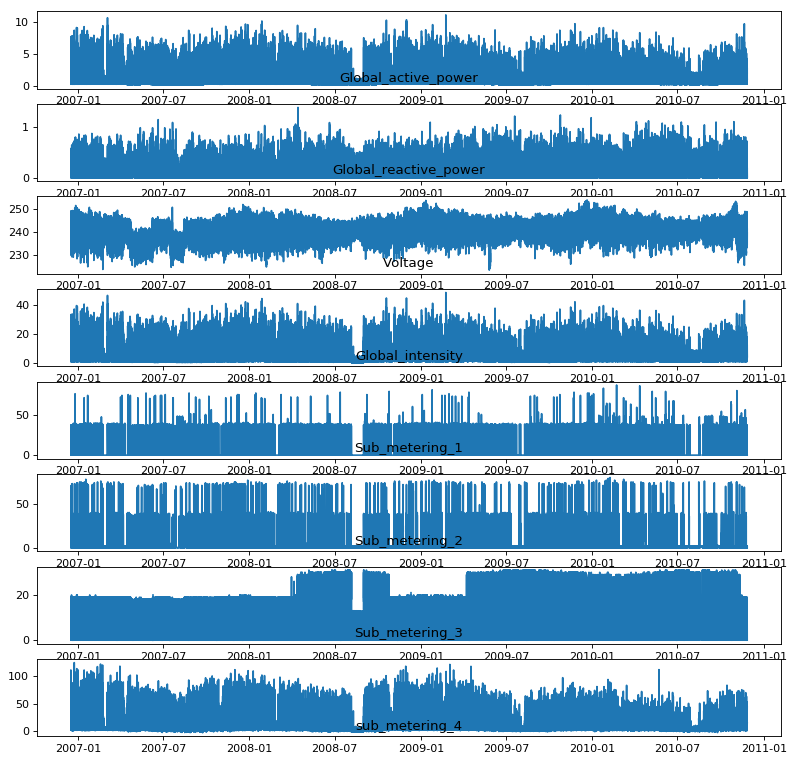

In [8]:
from matplotlib import pyplot
pyplot.figure(figsize=(12, 12), dpi=80)
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

Now lets focus on **Global_active_power**. We can create a new plot of the active power for each year to see if there are any common patterns across the years starting from 2007 as we have less data in 2006.

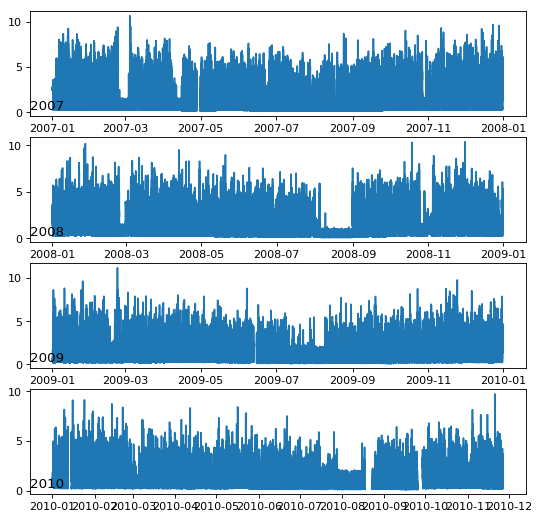

In [9]:
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize=(8, 8), dpi=80)
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

Lets look at **Active Power** consumption over 12 months in 2007. This will create 12 subplots under a single plot

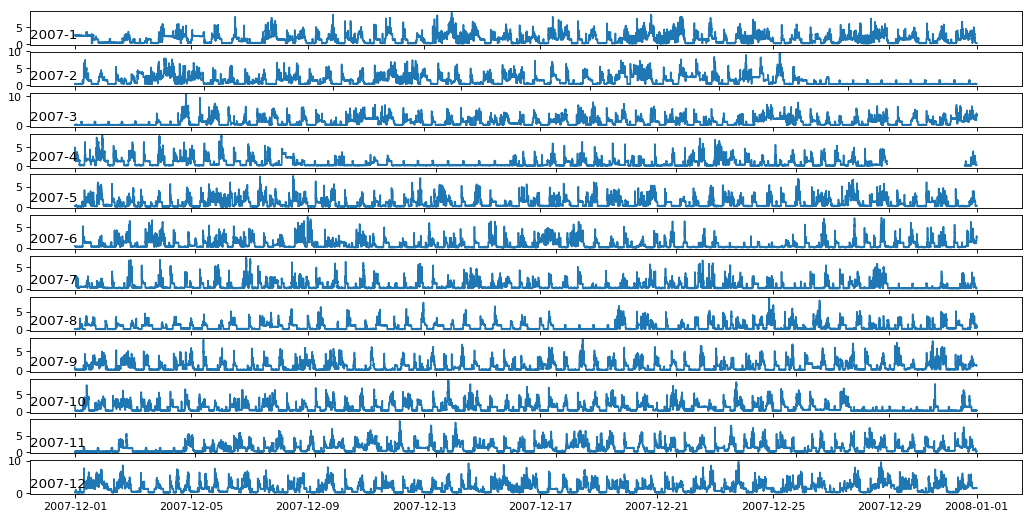

In [10]:
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(16, 8), dpi=80)
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

Let's Zoom down further and see the power consumption daily. Lets look at first 20 days of January, 2009. This will produce 20 subplots

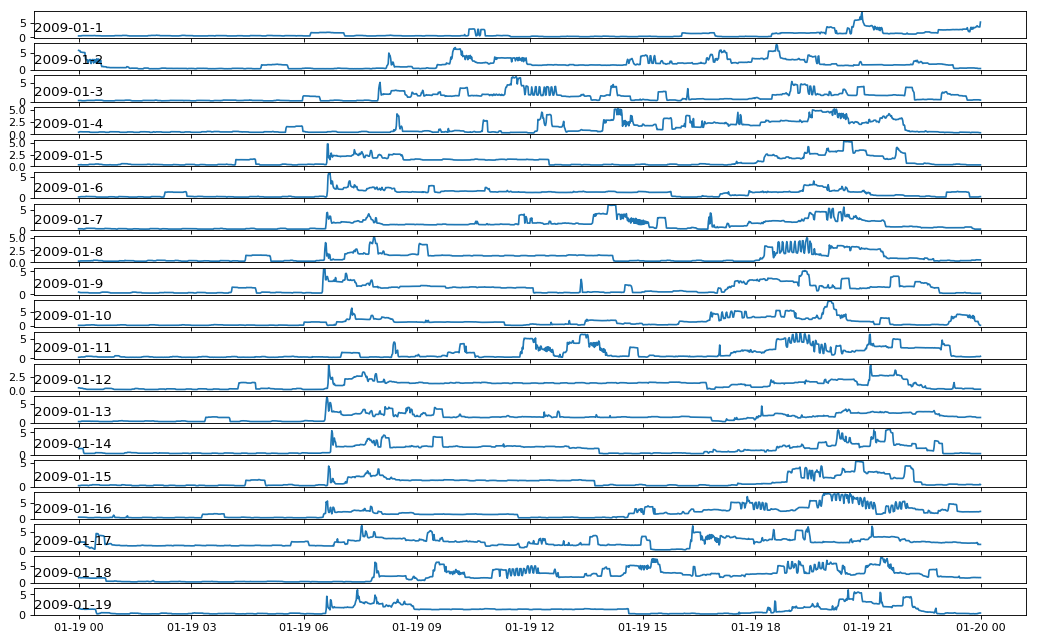

In [11]:
days = [x for x in range(1, 20)]
pyplot.figure(figsize=(16, 10), dpi=80)
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2009-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

Lets look at the distribution for each variable in the data

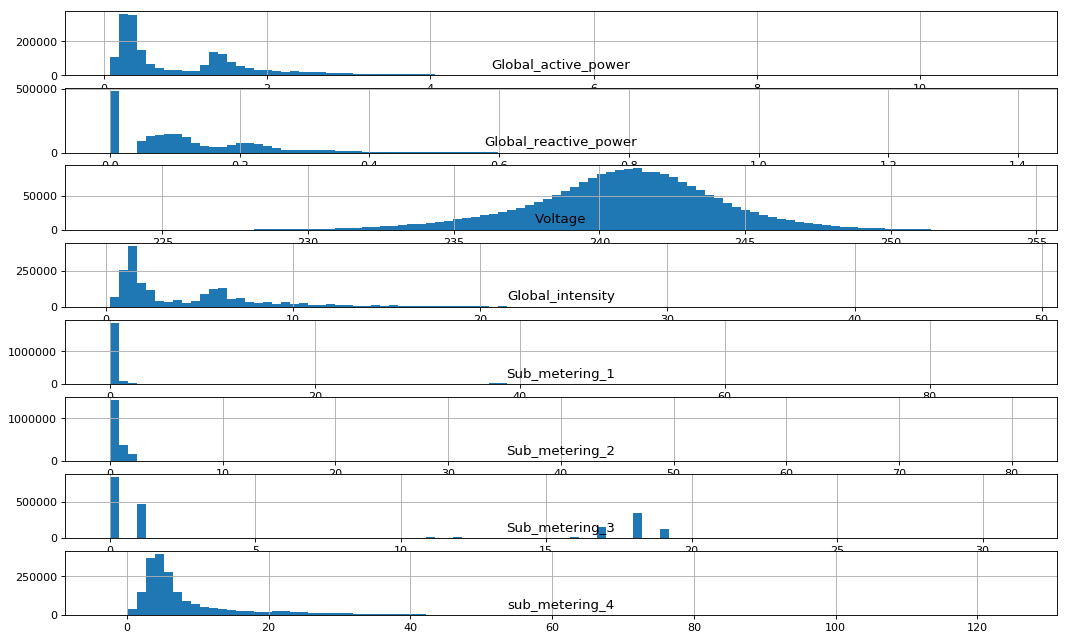

In [13]:
pyplot.figure(figsize=(16, 10), dpi=80)
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

The distribution of active power appears to be bi-modal, meaning it looks like it has two mean groups of observations.

We can investigate this further by looking at the distribution of active power consumption for the four full years of data.

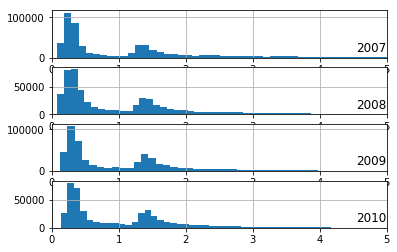

In [14]:
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='right')
pyplot.show()

Lets zoom down and see how is the distribution of active power at monthly level

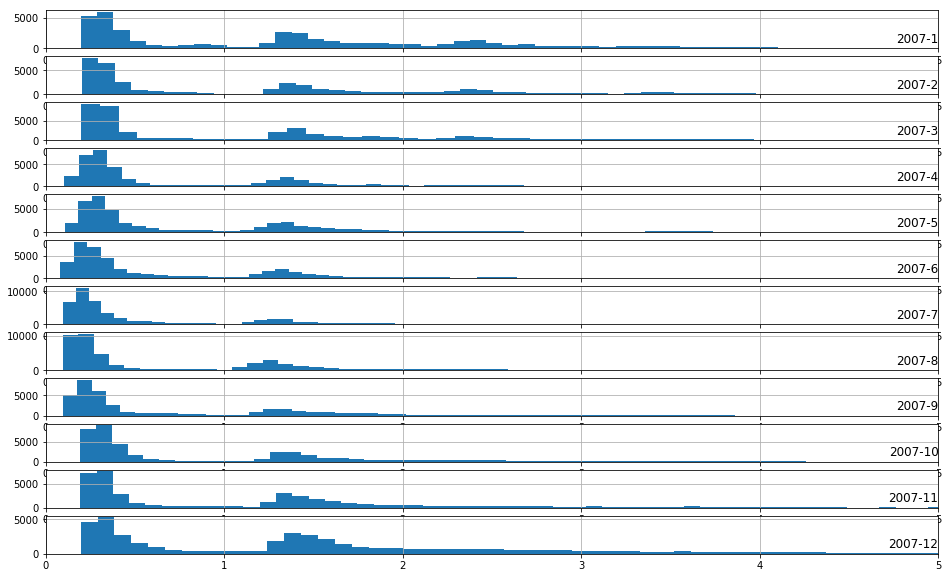

In [15]:
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(16,10))
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(month, y=0, loc='right')
pyplot.show()

## Examples of Forecast
* Forecast hourly consumption for the next day.
* Forecast daily consumption for the next week.
* Forecast daily consumption for the next month.
* Forecast monthly consumption for the next year.

Generally, these types of forecasting problems are referred to as multi-step forecasting. Models that make use of all of the variables might be referred to as a multivariate multi-step forecasting models.